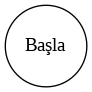

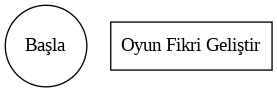

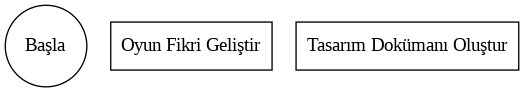

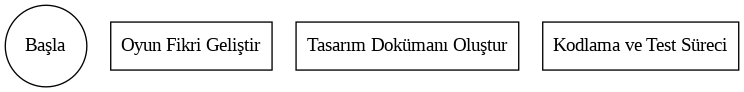

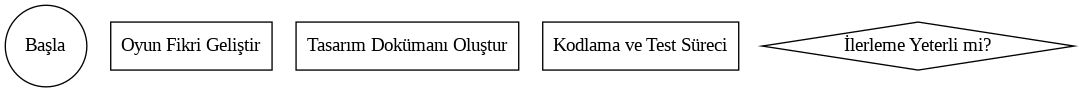

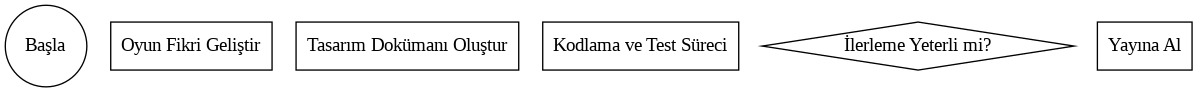

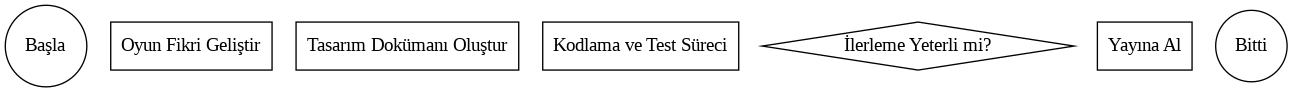

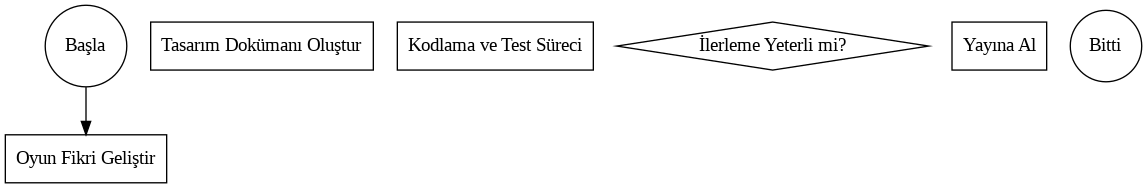

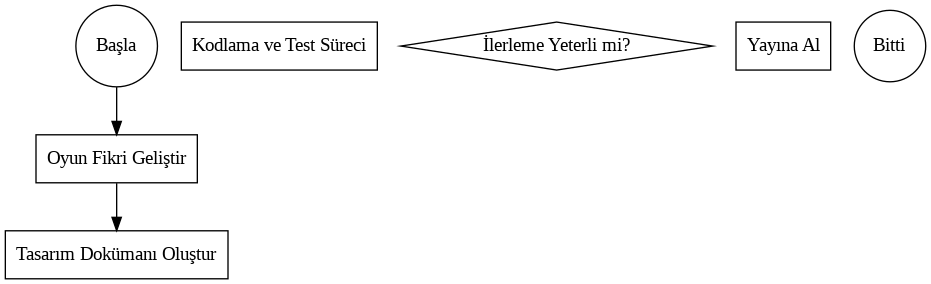

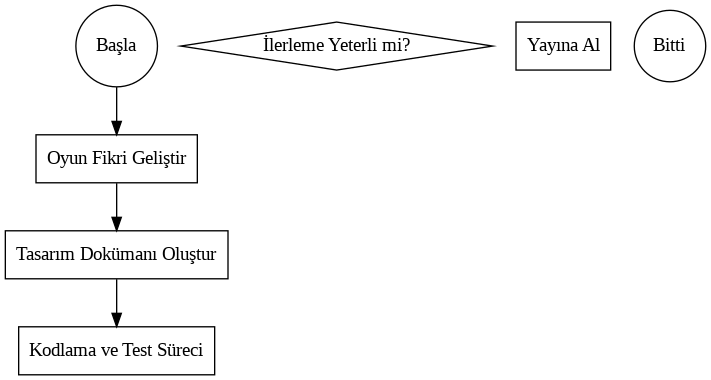

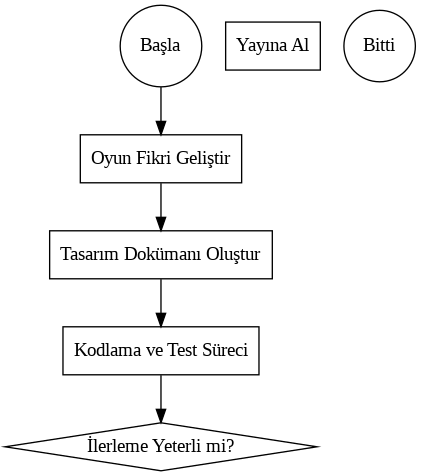

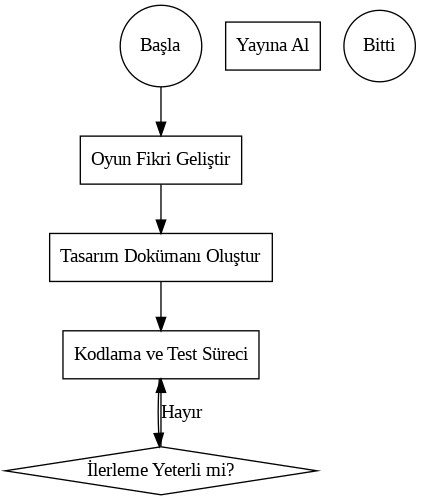

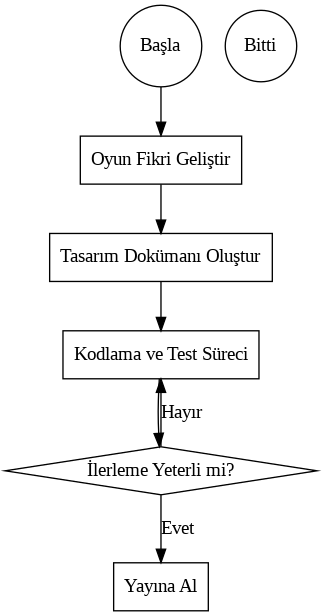

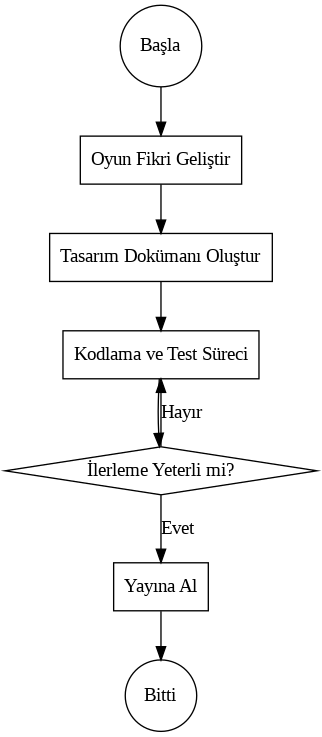

In [1]:
from graphviz import Digraph
import xml.etree.ElementTree as ET
from IPython.display import Image, display

# XML verisini string olarak tanımla
xml_data = '''<?xml version="1.0" encoding="UTF-8"?>
<definitions xmlns="http://www.omg.org/spec/BPMN/20100524/MODEL"
             xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
             xmlns:bpmndi="http://www.omg.org/spec/BPMN/20100524/DI"
             xmlns:omgdc="http://www.omg.org/spec/DD/20100524/DC"
             xmlns:omgdi="http://www.omg.org/spec/DD/20100524/DI"
             xmlns:tns="http://sourceforge.net/bpmn/definitions/_1416959412726"
             id="sample-diagram"
             targetNamespace="http://sourceforge.net/bpmn/definitions/_1416959412726">
    <process id="game_development" name="Game Development Process" isExecutable="true">
        <startEvent id="start" name="Başla"/>
        <sequenceFlow id="flow1" sourceRef="start" targetRef="game_idea"/>
        <task id="game_idea" name="Oyun Fikri Geliştir"/>
        <sequenceFlow id="flow2" sourceRef="game_idea" targetRef="design_doc"/>
        <task id="design_doc" name="Tasarım Dokümanı Oluştur"/>
        <sequenceFlow id="flow3" sourceRef="design_doc" targetRef="dev_loop"/>
        <task id="dev_loop" name="Kodlama ve Test Süreci"/>
        <sequenceFlow id="flow4" sourceRef="dev_loop" targetRef="decision"/>
        <exclusiveGateway id="decision" name="İlerleme Yeterli mi?"/>
        <sequenceFlow id="flow5" sourceRef="decision" targetRef="dev_loop">
            <conditionExpression xsi:type="tFormalExpression">Hayır</conditionExpression>
        </sequenceFlow>
        <sequenceFlow id="flow6" sourceRef="decision" targetRef="publish">
            <conditionExpression xsi:type="tFormalExpression">Evet</conditionExpression>
        </sequenceFlow>
        <task id="publish" name="Yayına Al"/>
        <sequenceFlow id="flow7" sourceRef="publish" targetRef="end"/>
        <endEvent id="end" name="Bitti"/>
    </process>
</definitions>
'''

# XML parse et
root = ET.fromstring(xml_data)

# Namespace tanımları
ns = {
    'bpmn': 'http://www.omg.org/spec/BPMN/20100524/MODEL'
}

dot = Digraph(comment='BPMN Süreci')

# BPMN düğümlerini ve oklarını adım adım çiz ve göster
for process in root.findall('.//bpmn:process', ns):
    for elem in process:
        tag = elem.tag.split('}')[-1]
        if tag in ['startEvent', 'endEvent', 'task', 'exclusiveGateway']:
            node_id = elem.attrib['id']
            label = elem.attrib.get('name', tag)
            shape = 'circle' if 'Event' in tag else 'diamond' if tag == 'exclusiveGateway' else 'box'
            dot.node(node_id, label, shape=shape)
            display(Image(dot.render(format='png', view=False)))  # Görseli göster

    for flow in process.findall('bpmn:sequenceFlow', ns):
        source = flow.attrib['sourceRef']
        target = flow.attrib['targetRef']
        label = ''
        for child in flow:
            if child.tag.endswith('conditionExpression'):
                label = child.text
        dot.edge(source, target, label)
        display(Image(dot.render(format='png', view=False)))  # Görseli göster